In [10]:
%pylab inline
from scipy import stats
from lmfit import Model
import seaborn as sns
sns.set_style('ticks')
sns.set_context('notebook', font_scale=1)

Populating the interactive namespace from numpy and matplotlib


In [11]:
def lrt(model_fit0, model_fit1):
    n0 = model_fit0.ndata
    k0 = model_fit0.nvarys
    rss0 = np.float((model_fit0.residual**2).sum())
    print "rss0",rss0
    n1 = model_fit1.ndata
    k1 = model_fit1.nvarys
    rss1 = np.float((model_fit1.residual**2).sum())
    print "rss1",rss1
    #D = 2 * np.log(rss0 / rss1) # rss is a subtitute for likelihood, assuming normally distributed residuals
    #ddf = k1 - k0
    #print D,ddf
    #return stats.chi2.sf(D, ddf)

    df_diff = -(k0 - k1)
    f_value = (rss0 - rss1) / df_diff / rss1 * k1
    p_value = stats.f.sf(f_value, df_diff, k1)
    return p_value,f_value,df_diff

{'a': 1.9277182711310406, 'b': 0.54177311937373585}
{'a': 2.7362942641508594, 'b': 0}
rss0 8.37343045256
rss1 0.924855427267


(0.056841051724620249, 16.10754460792346, 1)

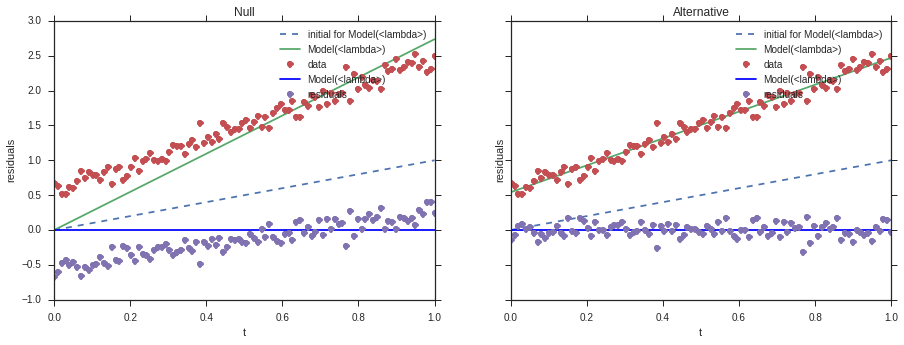

In [15]:
# test lrt
fig, ax = subplots(1,2,sharex=True,sharey=True,figsize=(15,5))

_t = linspace(0,1,100)
_data = (2*_t+0.5) + normal(0,0.1,100)
#plot(_t,  _data)
_model = Model(lambda t,a,b: (a*t+b))
_params = _model.make_params(a=1,b=0)

_model_fit1 = _model.fit(_data, t=_t, params=_params)
_model_fit1.plot_fit(ax=ax[1])
ax[1].set_title("Alternative")
_model_fit1.plot_residuals(ax[1])
print _model_fit1.best_values

_params['b'].set(vary=False)
_model_fit0 = _model.fit(_data, t=_t, params=_params)
_model_fit0.plot_fit(ax=ax[0])
_model_fit0.plot_residuals(ax[0])
ax[0].set_title("Null")
print _model_fit0.best_values

lrt(_model_fit0, _model_fit1)


In [13]:
slope,intercept,r_val,p_val,stderr_val = stats.linregress(_t,_data)
print p_val, intercept, slope

3.94154040838e-82 0.511472813384 1.99467443588
